# Download Multiple .nc Files

In [1]:
# Download Files to relative folder  
from hypso import download_nc_files
            
download_nc_files(filename_list=["tibet_2022-09-29_0446Z.nc", "xaafuun_2023-09-11_0623Z-l1a.nc","vancouver_2023-05-25_1831Z-l1a.nc"],
                  output_dir="downl_dir")

Downloading: tibet_2022-09-29_0446Z.nc [=================================] 100%
Downloading: xaafuun_2023-09-11_0623Z-l1a.nc [===========================] 100%
Downloading: vancouver_2023-05-25_1831Z-l1a.nc [=========================] 100%


# Read .nc File

Processing *wide* Image with Dimensions: (598, 1092)
  Position timeseries path: 
    /Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z_tmp/position.csv 
  Quaternion timeseries path: 
    /Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z_tmp/quaternion.csv 
  Frame timestamps path: 
    /Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z_tmp/timestamps_services.txt

  eci position samples 1912
  quaternion samples 1912

   ADCS time range: 1686821820.000000 to 1686822711.500000
  Frame time range: 1686822481.728884 to 1686822531.478884

  199 sample(s) inside frame time range
  Interpolating 598 frames
Done
Geometric Computations
Spatial dimensions: 598 frames/lines, 1092 pixels/samples
  Pixel coordinates ...
  Plotting computations ...
  Interpolating pixel coordinate gaps ...
  Local angles (sun and satellite azimuth and zenith angles) ...
  Image Center (lat,lon): (60.91433	010.28206)
  Image Center elevation angle: 60.94332
  Image Center off-nadir angle: 21.23259
Radiomet

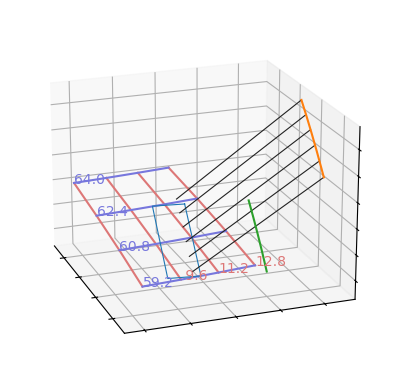

In [1]:
# Import Satellite Object
from hypso import Satellite

# Define HYPSO Image File and the .points from QGIS (if available)
hypso_file_path="/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1a.nc"
points_path = "/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-rgba_8bit.tif.points"

# Create Satellite Object
# l1b.nc is Generated when loading l1a.nc for the first time
satobj = Satellite(hypso_file_path, points_path=points_path)

# Compare L1A and L1B .nc files

In [2]:
from hypso.utils import compare_netcdf_files
hypso_path_l1a="/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1a.nc"

# L1B is Generated when loading l1a.nc for the first time
hypso_path_l1b = "/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1b.nc" 

summary_l1a_l1b = compare_netcdf_files(hypso_path_l1a, hypso_path_l1b)
summary_l1a_l1b.head(10)

label         presence  validator  \
0              (/, dimensions, lines)  Present in Both      equal   
1            (/, dimensions, samples)  Present in Both      equal   
2              (/, dimensions, bands)  Present in Both      equal   
3        (/, dimensions, adcssamples)  Present in Both      equal   
4            (/, dimensions, radrows)  Present in Both  different   
5            (/, dimensions, radcols)  Present in Both  different   
6           (/, dimensions, specrows)  Present in Both  different   
7   (/, group_attributes, instrument)  Present in Both      equal   
8  (/, group_attributes, institution)  Present in Both      equal   
9   (/, group_attributes, resolution)  Present in Both      equal   

                    mjosa_2023-06-15_0948Z-l1a.nc  \
0                                             598   
1                                            1092   
2                                             120   
3                                            1912   
4                                            1216   
5                                            1936   
6                                               4   
7                    HYPSO-1 Hyperspectral Imager   
8  Norwegian University of Science and Technology   
9                                             N/A   

                    mjosa_2023-06-15_0948Z-l1b.nc  
0                                             598  
1                                            1092  
2                                             120  
3                                            1912  
4                                            1092  
5                                             120  
6                                             120  
7                    HYPSO-1 Hyperspectral Imager  
8  Norwegian University of Science and Technology  
9                                             N/A

# Generate L1C Geotiff Product

Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [59.30696, 62.524284, 8.8205805, 11.828691]
    using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
    Area covered by image: 28628943217.804348 m^2 = 28628.943217804346 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1284864 / 2517394
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 11
      Starting band 61
      Starting band 50
      Starting band 31
      Done with band 61      Done with band 11
      Done with band 31
      Done with band 50


/Users/alvaroflores/miniforge3/envs/condadev/lib/python3.9/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Done RGB/RGBA Geotiff
RGBA Tif File:  mjosa_2023-06-15_0948Z-rgba_8bit.tif
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505           59.756197
4            10.380956           59.959049
5             9.654835            60.01048
6            10.005274           60.607818
7            10.727707           60.802114
8            10.400754           60.904713
9            10.429935           60.964835
10           10.153709           61.127709
11           11.523019           62.191321
12           11.633964           62.255133
13           11.427097           62.254831
Hypso Destination
     transformed_mapLon  transformed_mapLat
0            10.366577           59.716311
1            10.241021           59.569467
2            10.386577           59.438368
3            10.595467

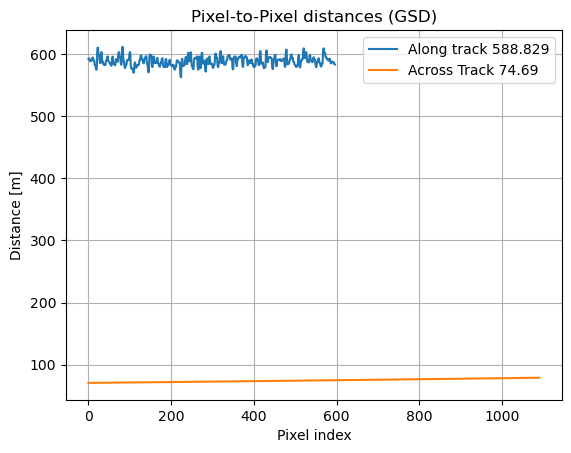

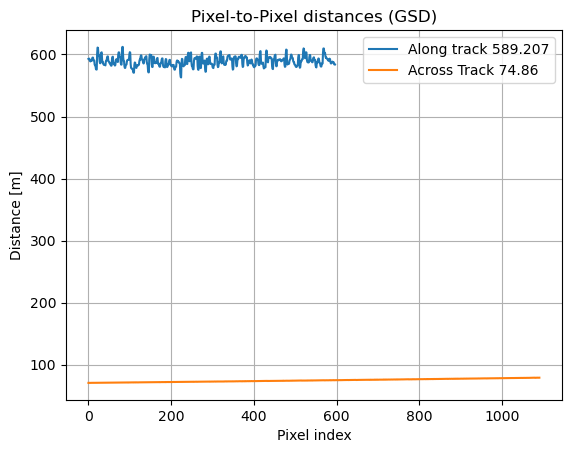

In [3]:
# Get Product
satobj.get_geotiff(product="L1C", force_reload=False)

# Get Radiance from L1C Product

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (59.5, 10) -→ (1883, 77)


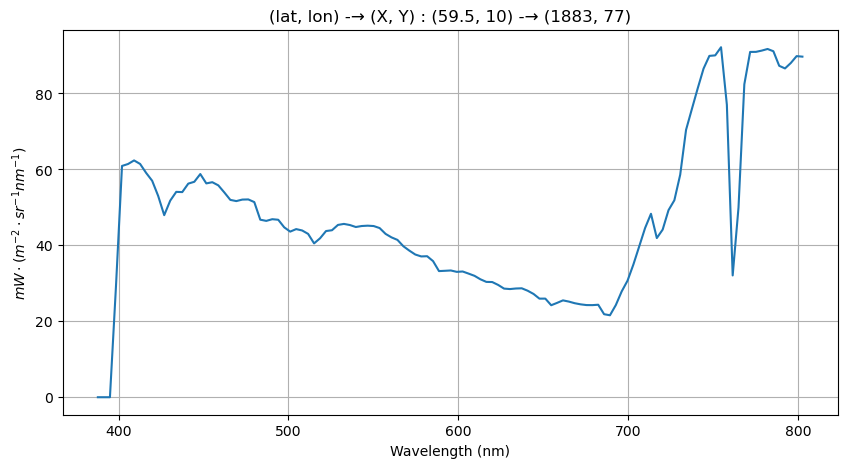

wl   radiance   lat  lon     X   Y
0  387.847497   0.000000  59.5   10  1883  77
1  391.404066   0.000000  59.5   10  1883  77
2  394.959416   0.000000  59.5   10  1883  77
3  398.513546  29.226183  59.5   10  1883  77
4  402.066457  60.909856  59.5   10  1883  77

In [4]:
spectra_l1c = satobj.get_spectra(product="L1C",
                              position_dict={"lat":59.5,"lon":10},
                              postype="coord", plot=True)

spectra_l1c.head()

# Create L2 Geotiff Product with ACOLITE
(WARNING: Takes a long time when run the first time due to downloads. Please be Patient.)

RGBA Tif File:  mjosa_2023-06-15_0948Z-rgba_8bit.tif
Full L1C Tif File:  mjosa_2023-06-15_0948Z-full_L1C.tif
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505           59.756197
4            10.380956           59.959049
5             9.654835            60.01048
6            10.005274           60.607818
7            10.727707           60.802114
8            10.400754           60.904713
9            10.429935           60.964835
10           10.153709           61.127709
11           11.523019           62.191321
12           11.633964           62.255133
13           11.427097           62.254831
Hypso Destination
     transformed_mapLon  transformed_mapLat
0            10.366577           59.716311
1            10.241021           59.569467
2            10.386577         

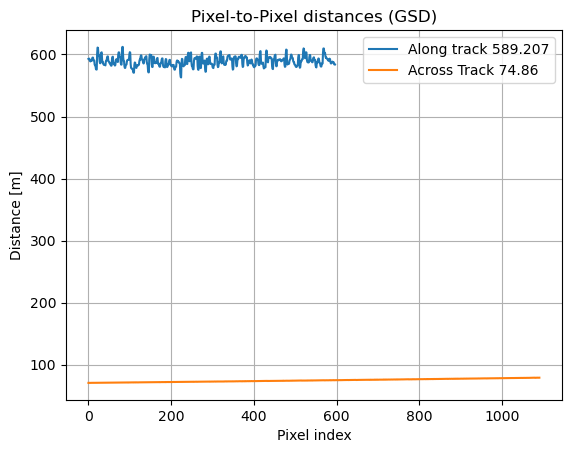

In [5]:
# user and password from https://urs.earthdata.nasa.gov/profile
# optional but good
atmos_params = {
    'model': "ACOLITE",
    'user':'alvarof',
    'password':'nwz7xmu8dak.UDG9kqz'
}

satobj.get_geotiff(product="L2", force_reload=False, atmos_dict=atmos_params)

# Create L2 Geotiff Product with 6SV1

RGBA Tif File:  mjosa_2023-06-15_0948Z-rgba_8bit.tif
Full L2 Tif File:  mjosa_2023-06-15_0948Z-full_L2_ACOLITE.tif
Full L1C Tif File:  mjosa_2023-06-15_0948Z-full_L1C.tif
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505           59.756197
4            10.380956           59.959049
5             9.654835            60.01048
6            10.005274           60.607818
7            10.727707           60.802114
8            10.400754           60.904713
9            10.429935           60.964835
10           10.153709           61.127709
11           11.523019           62.191321
12           11.633964           62.255133
13           11.427097           62.254831
Hypso Destination
     transformed_mapLon  transformed_mapLat
0            10.366577           59.716311
1           

100%|██████████| 120/120 [00:27<00:00,  4.41it/s]


Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [59.218143, 62.437134, 9.122029, 12.129085]
    using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
    Area covered by image: 28714069850.480743 m^2 = 28714.069850480744 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1284705 / 2493067
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 0
      Starting band 1
      Starting band 2
      Starting band 3
      Starting band 4
      Starting band 5
      Starting band 6
      Starting band 7
      Starting band 8
      Starting band 9
      Starting band 10
      Starting band 11
      Starting band 12
      Starting band 13
      Starting band 14
      Starting band 15
      Starting band 16
      Starting band 17
      Starting band 18
      Starting band 19
      Starting band 20
      Starting band 21
      Starting band 22
      Starting

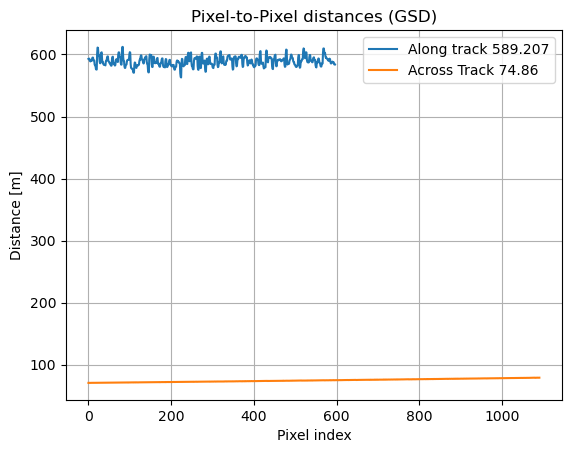

In [6]:
atmos_params = {
    'model': "6SV1",
    'aot550': 0.0580000256
}

# AOT550 parameter gotten from: https://giovanni.gsfc.nasa.gov/giovanni/
# In this case, if you force reload, you would delete L1C so we set it to False
satobj.get_geotiff(product="L2", force_reload=False, atmos_dict=atmos_params)

# Get Rrs from ACOLITE L2 Product

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (59.5, 10) -→ (1883, 77)


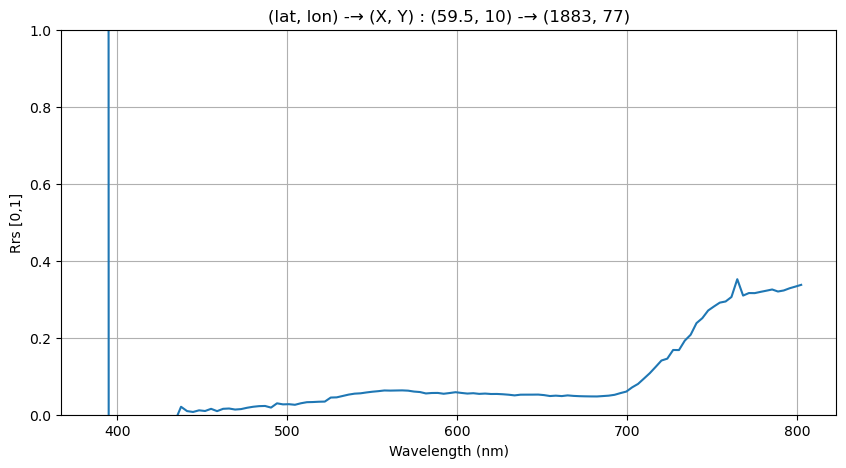

wl        rrs   lat  lon     X   Y
0  387.847497   9.698041  59.5   10  1883  77
1  391.404066  59.588702  59.5   10  1883  77
2  394.959416  -0.327150  59.5   10  1883  77
3  398.513546  -0.308982  59.5   10  1883  77
4  402.066457  -0.292325  59.5   10  1883  77

In [7]:
spectra_L2_acolite = satobj.get_spectra(product="L2", L2_engine="ACOLITE",
                              position_dict={"lat":59.5,"lon":10},
                              postype="coord", plot=True) # Mjosa Sandvika

spectra_L2_acolite.head()

# Get Rrs from 6SV1 L2 Product

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (59.5, 10) -→ (1883, 77)


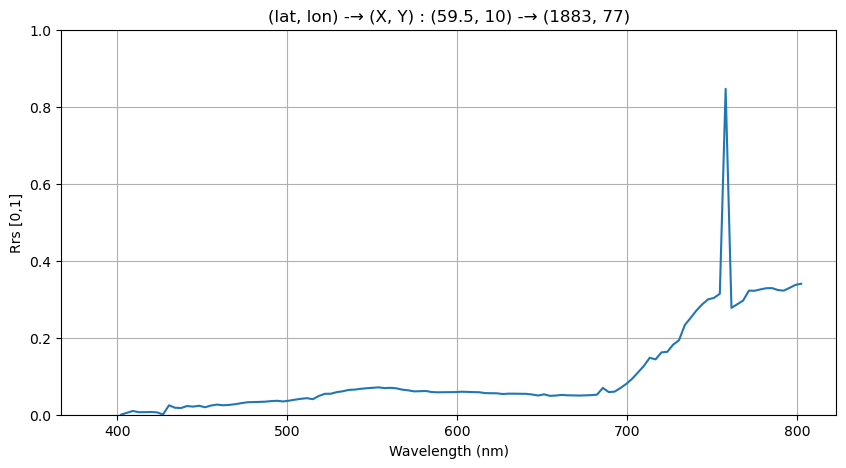

wl           rrs   lat  lon     X   Y
0  387.847497 -2.861471e-01  59.5   10  1883  77
1  391.404066 -2.678701e-01  59.5   10  1883  77
2  394.959416 -2.581136e-01  59.5   10  1883  77
3  398.513546 -1.220246e-01  59.5   10  1883  77
4  402.066457 -5.526994e-07  59.5   10  1883  77

In [8]:
spectra_L2_6sv1 = satobj.get_spectra(product="L2", L2_engine="6SV1",
                              position_dict={"lat":59.5,"lon":10},
                              postype="coord", plot=True) # Mjosa Sandvika

spectra_L2_6sv1.head()

# Overlay RGB on Map

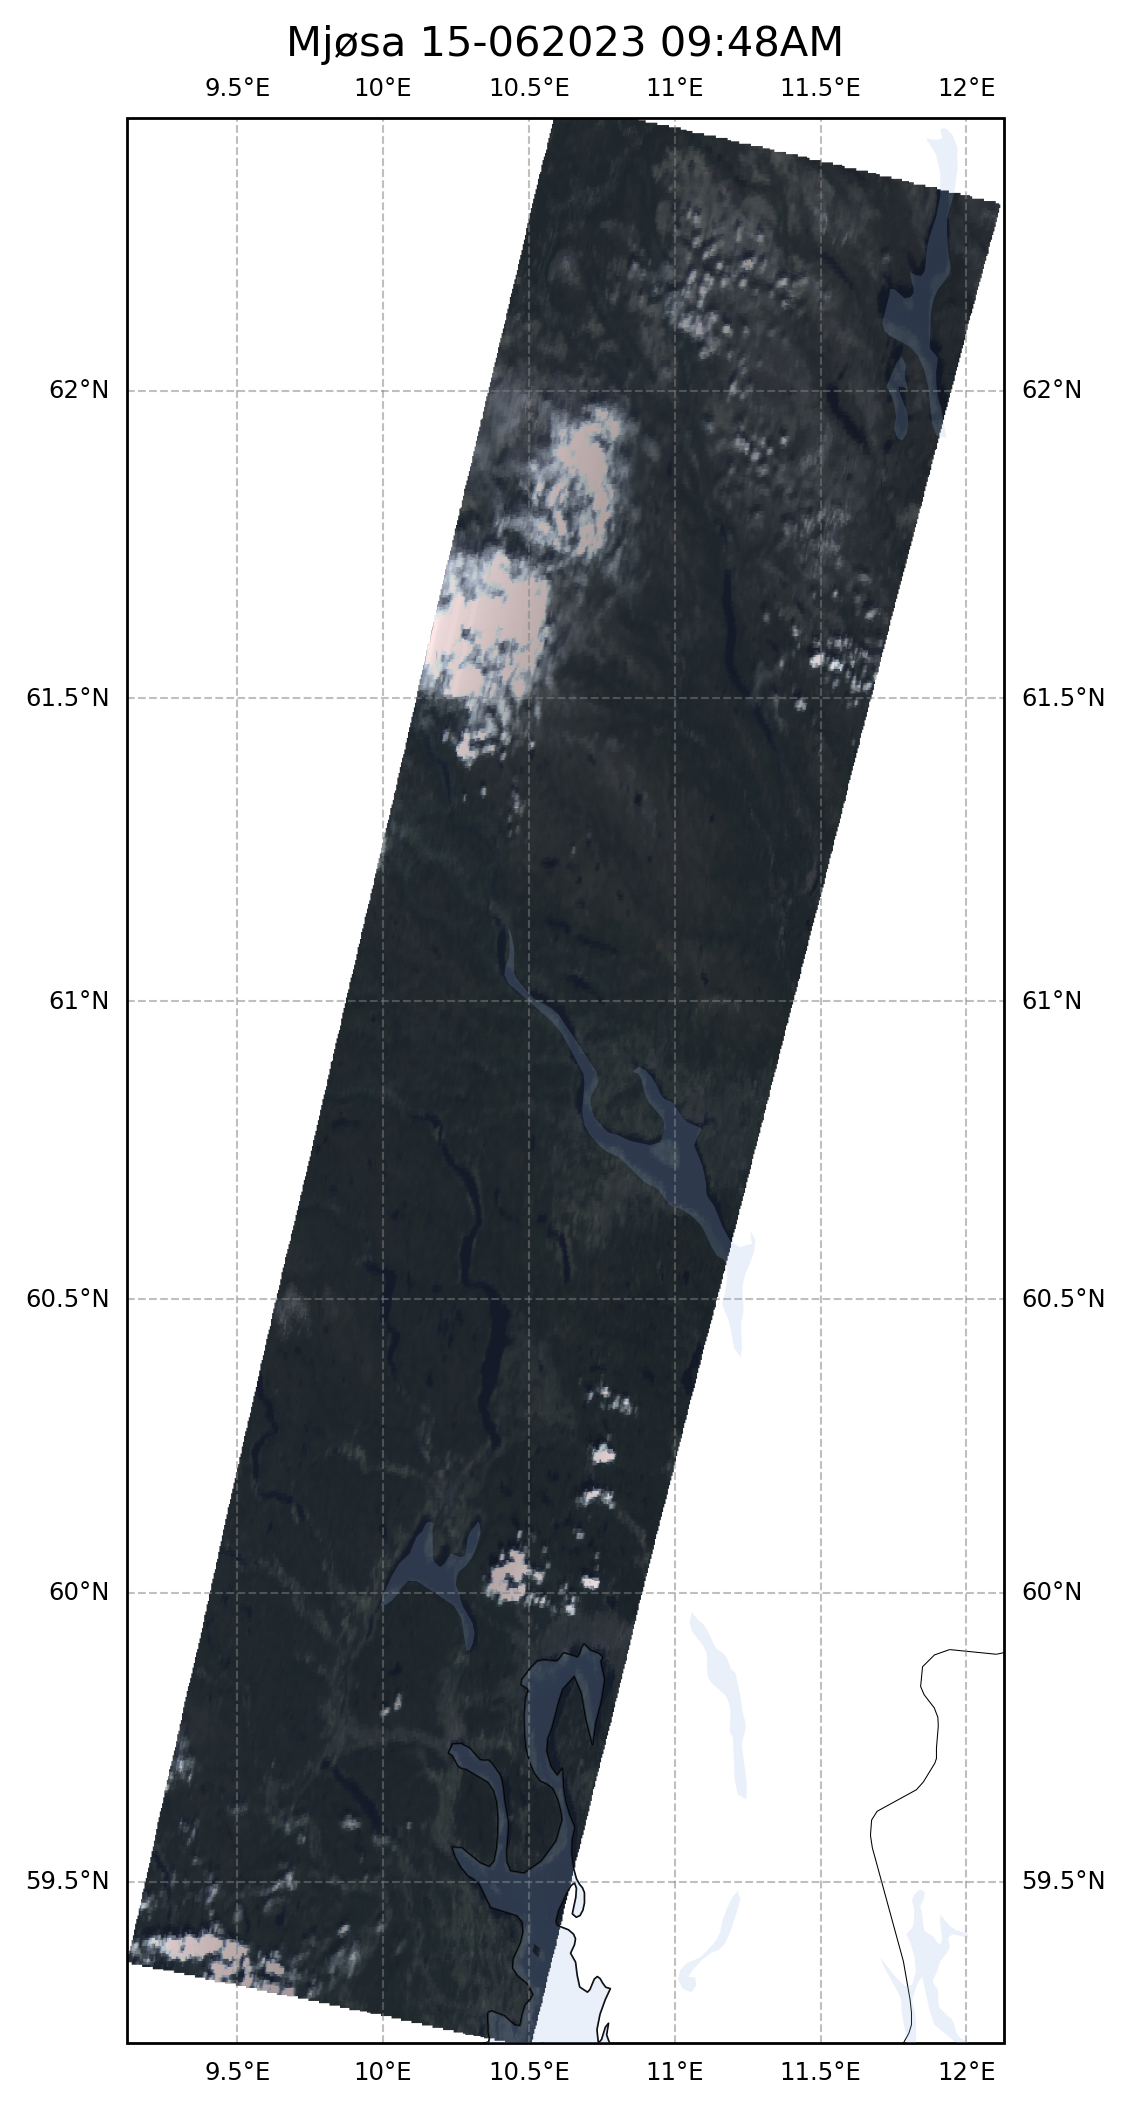

In [9]:
# Import Functions
from hypso.plot import show_rgb_map

# Show Map
show_rgb_map(satobj, plotTitle="Mjøsa 15-062023 09:48AM",dpi_input=250)

## Draw Points/Marks on Map

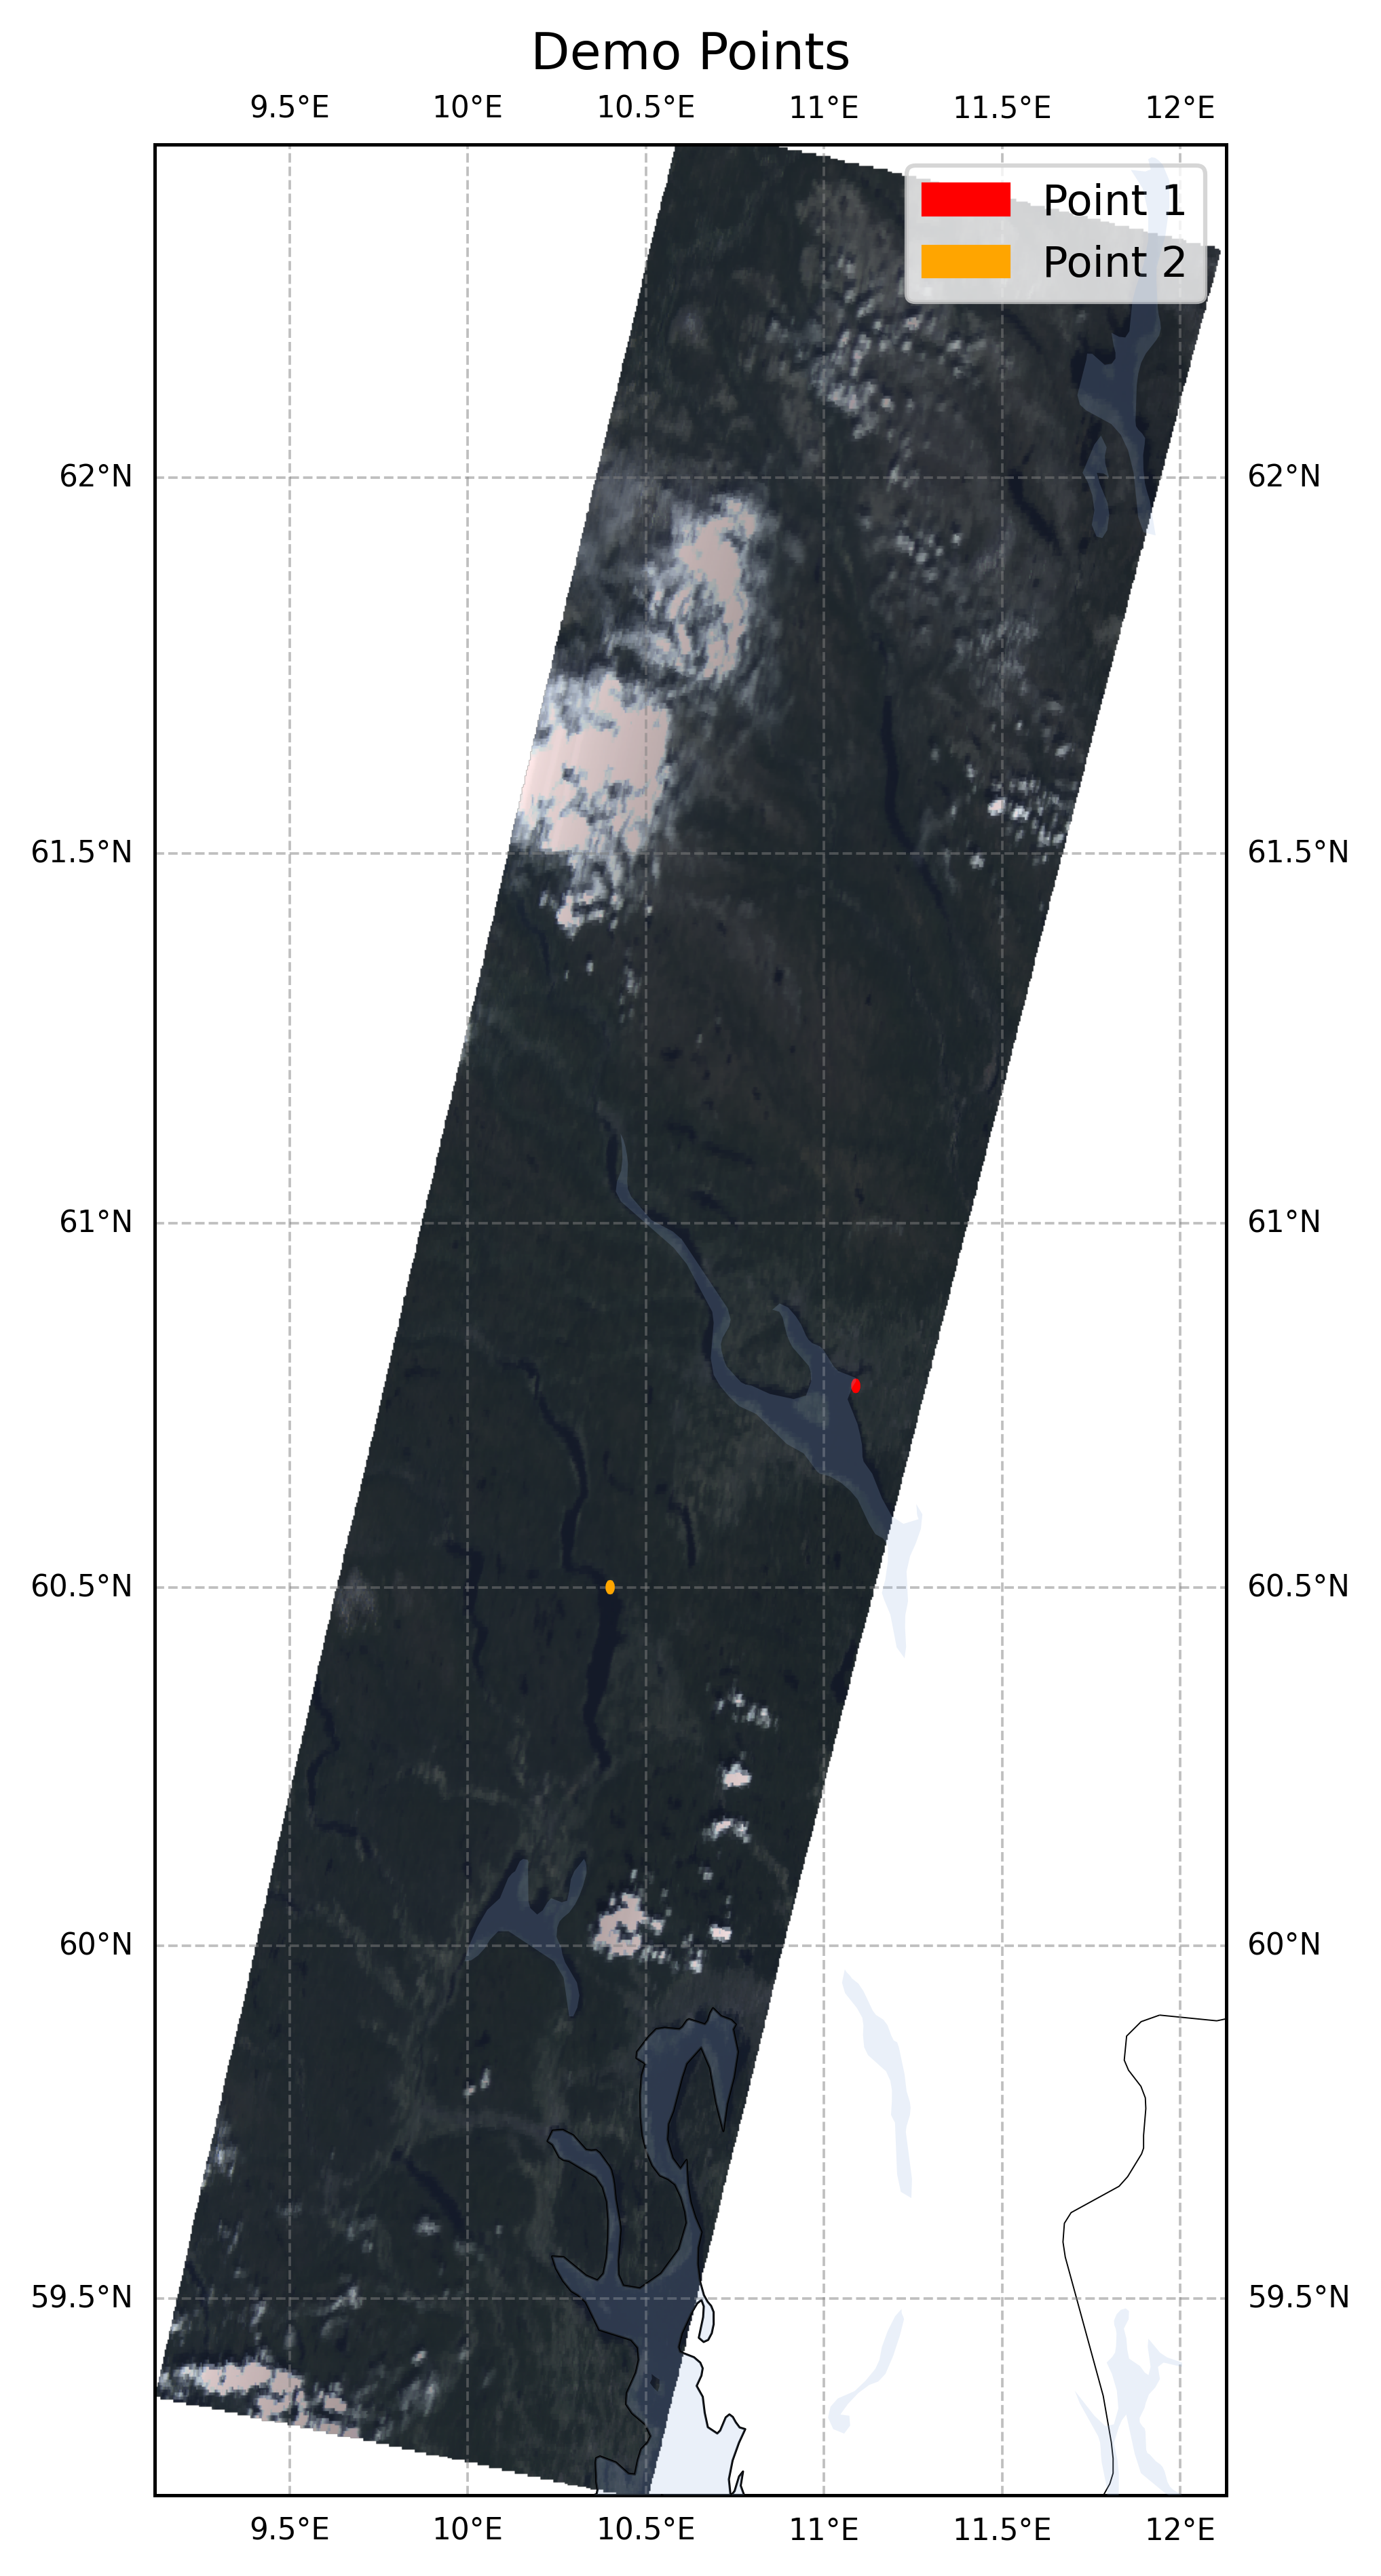

In [10]:
from hypso.plot import point_rgb_map

points_dict={
    "Point 1":{
        "lat":60.7776,
        "lon":11.0895,
        "color":"red"
    },
    "Point 2":{
        "lat":60.5,
        "lon":10.4,
        "color":"orange"
    }
}
point_rgb_map(satobj,patch_dict=points_dict,r_plot=0.007,plotTitle=f"Demo Points",path_to_save=None)


## Plot 2D Array on Map

2D Array Plot Range:  [0.01, 100]


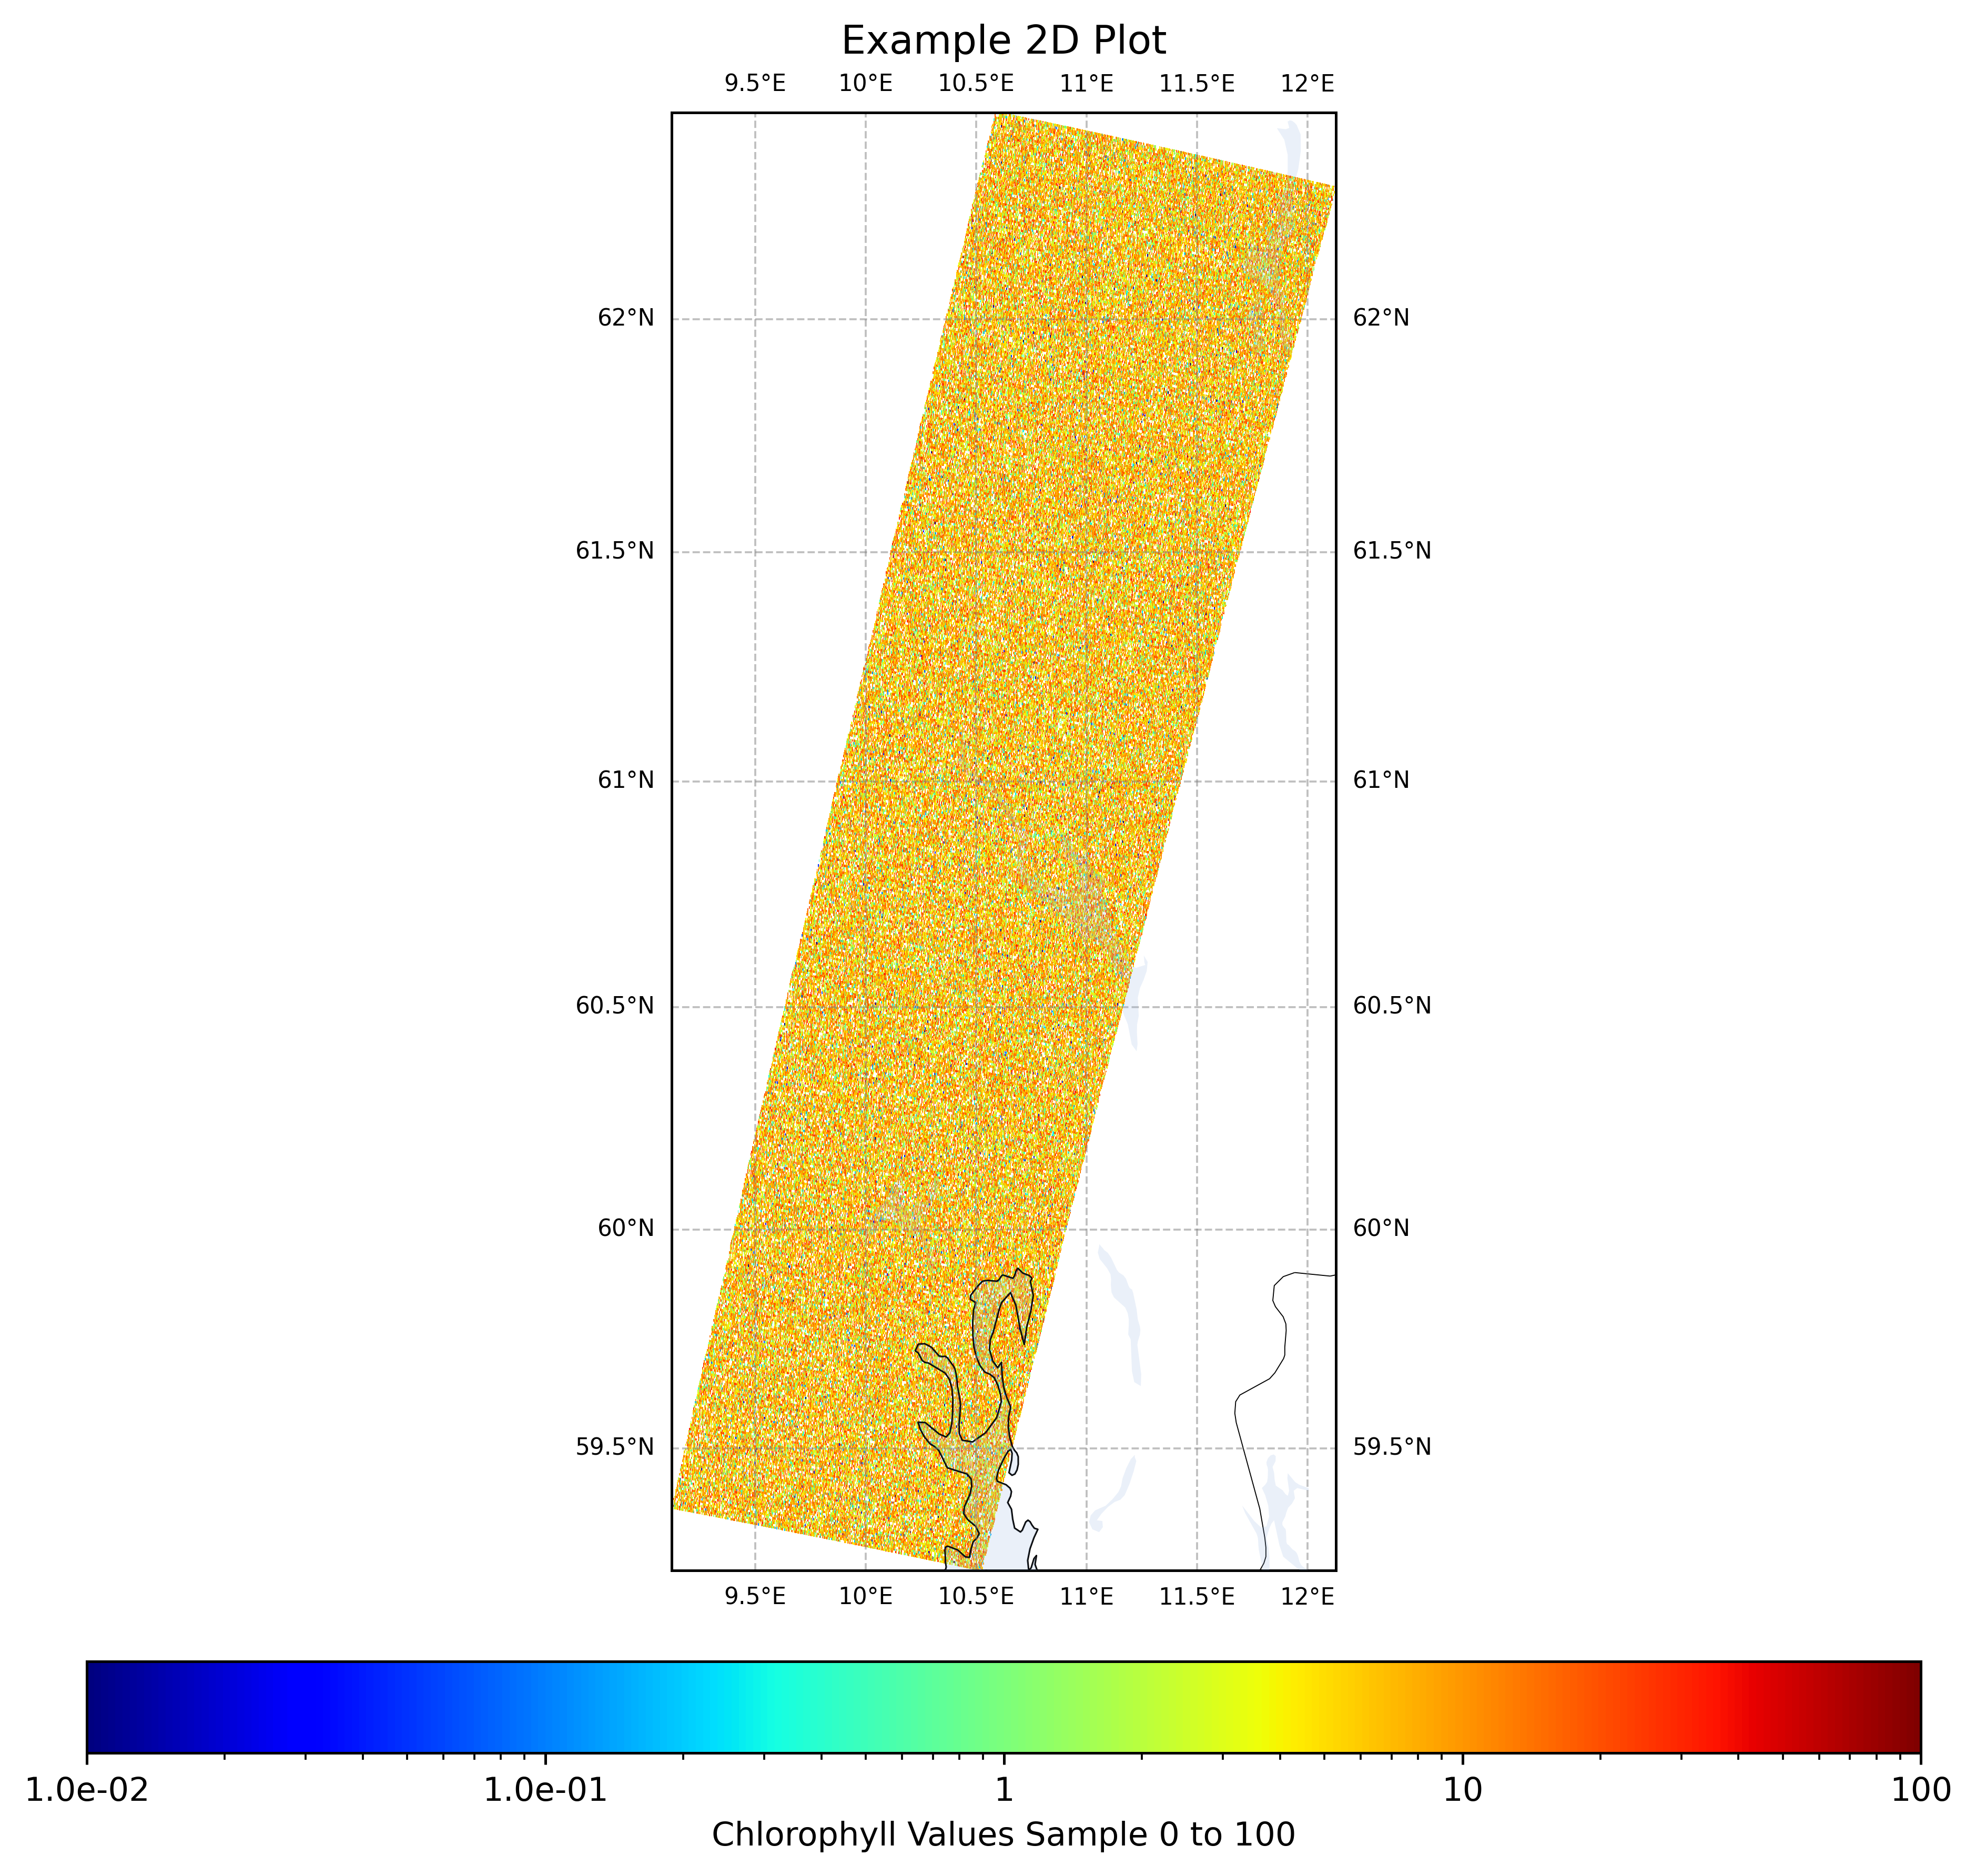

In [11]:
# Create Random Array of Chlorophyll Values
import numpy as np
chl_array = np.random.normal(1, 10, size=satobj.spatialDim)


from hypso.plot import plot_array_overlay
# Plot Array on Map
plot_array_overlay(satobj,chl_array, plotTitle="Example 2D Plot",cbar_title="Chlorophyll Values Sample 0 to 100", min_value=0.01,max_value=100)

## Export RGB to .png

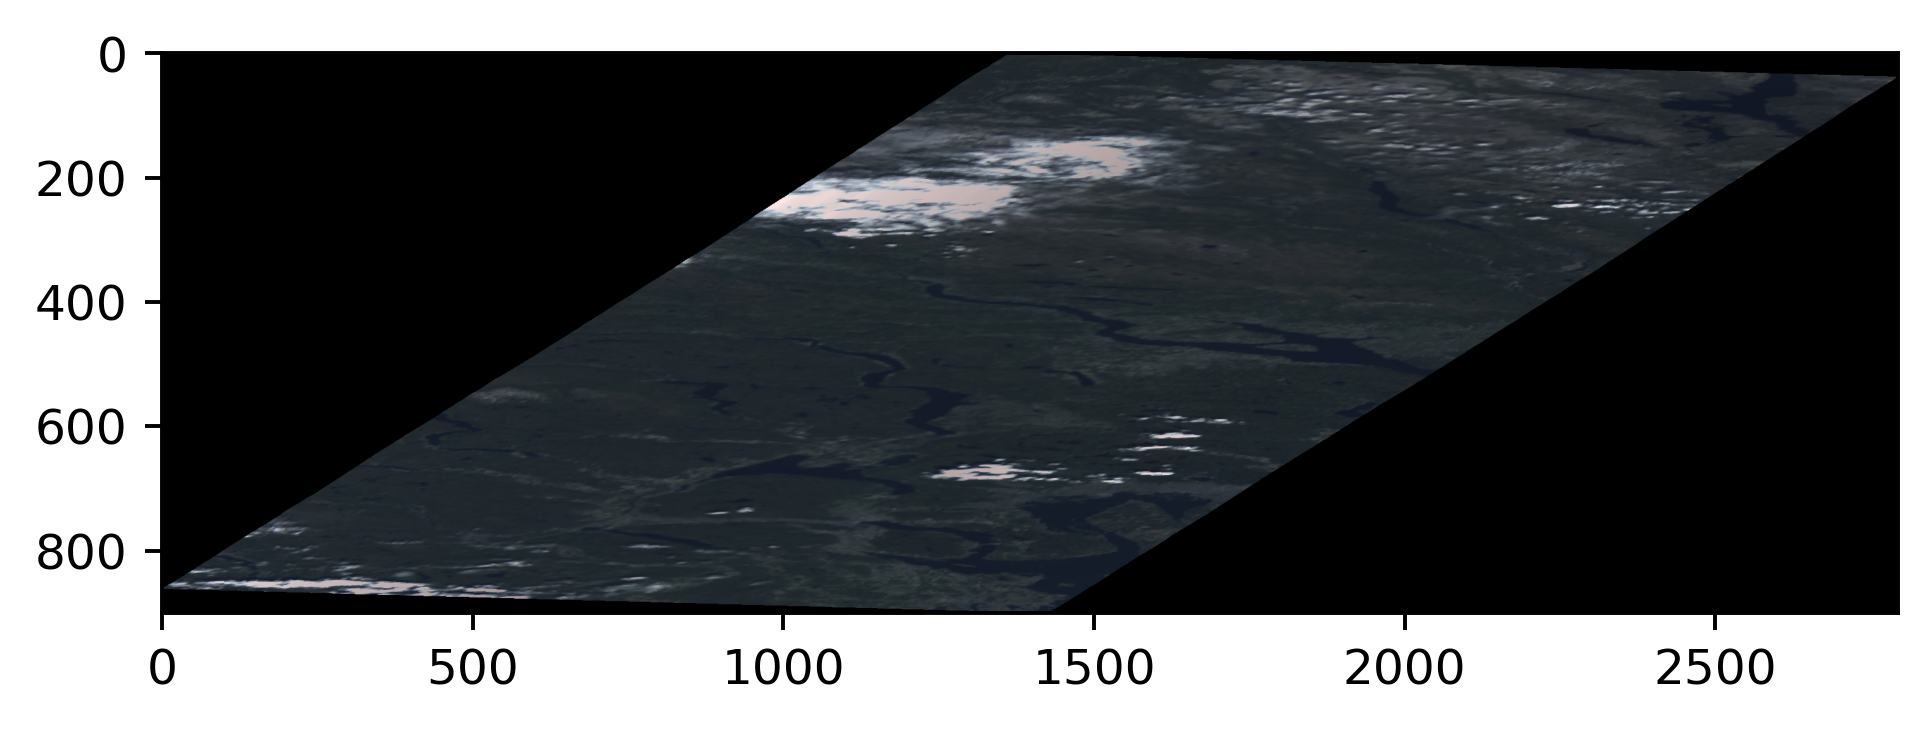

In [12]:
from hypso.plot import write_rgb_to_png

# Export Georeferenced RGB to png
write_rgb_to_png(satobj,path_to_save=r"/Users/alvaroflores/Desktop/image_demo.png")

## Estimate Water Mask



-------  Naive-Bayes Water Mask Detector  ----------
Loading configuration file /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini
File /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini verified.
[['ndwi', 'Nir'], ['otsu', 'ndwi']]
maxndwi
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=10828.109141244833
k=3 :Calinski_harabaz index=21100.067891787046
k=4 :Calinski_harabaz index=16421.03889421858
k=5 :Calinski_harabaz index=14860.275710310105
k=6 :Calinski_harabaz index=11892.713703333693
k=7 :Calinski_harabaz index=26221.46581253129
Applying clusters based naive bayes classifier
Assgnin 1 to cluster_id 0
Skipping cluster_id 0


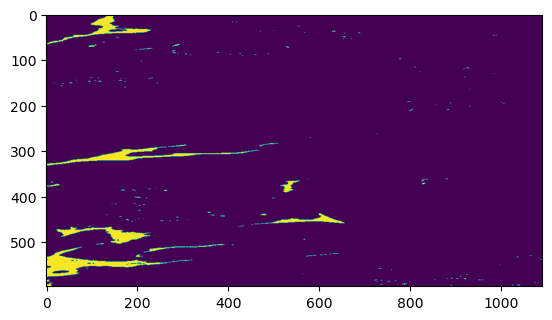

In [13]:
from hypso.classification import ndwi_watermask

# Calculate Water Mask With Binary Values
ndwi_watermask(satobj)

# Show Water Mask
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(satobj.waterMask)
plt.show()

## Print Contents of .nc file

In [14]:
from hypso.utils import print_nc

hypso_file_path="/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1a.nc"
# Print Attributes and Groups of .nc file generated
print_nc(hypso_file_path)

--- GROUP: "/" ---
DIMENSIONS: lines (598), samples (1092), bands (120), adcssamples (1912), radrows (1216), radcols (1936), specrows (4), 
GROUP ATTRIBUTES: instrument, institution, resolution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, target_coords, radiometric_file, spectral_file, md5sum, byte_size_compressed_cube, warnings, 
VARIABLES: 
VAR ATTRIBUTES: 
SUB-GROUPS: logfiles, products, metadata, navigation, 

  --- GROUP: "/logfiles" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: 
  VAR ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: Lt (lines, samples, bands), 
  VAR ATTRIBUTES: 

      Lt
      ---units: W/m^2/micrometer/sr
      ---long_name: Top of Atmosphere Measured Radiance
      ---wavelength_units: nanometers
      ---fwhm (120,): [5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 

## === Use Case: Compare L1B and L1C on the same location ===

Min Lat:  59.218143
Max Lat:  62.437134
Min Lon:  9.122029
Max Lon:  12.129085
------------------------ 

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (59.5, 10.0) -→ (1883, 77)


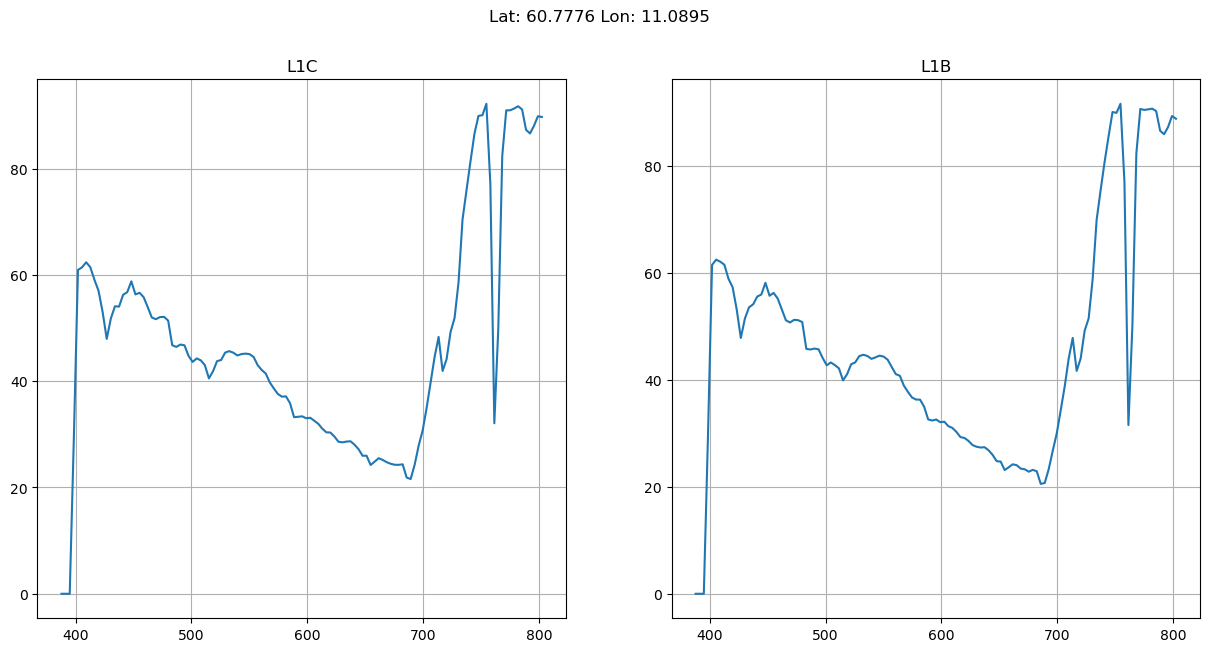

In [19]:
# Comparing Data Points
import numpy as np
import matplotlib.pyplot as plt

# Get min and max Values of Lat and Lon
print("Min Lat: ",np.nanmin(satobj.info["lat"]))
print("Max Lat: ",np.nanmax(satobj.info["lat"]))
print("Min Lon: ",np.nanmin(satobj.info["lon"]))
print("Max Lon: ",np.nanmax(satobj.info["lon"]))

print("------------------------ \n")

# Get Spectra L1C from a coordinate that is inside the values from above 
lat = 59.5
lon = 10.0
spectra_test1 = satobj.get_spectra(product="L1C",
                                   position_dict={"lat":lat,"lon":lon},postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv", plot=False) # Mjøsa
spectra_test1.head()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 7))
fig.suptitle('Lat: 60.7776 Lon: 11.0895')

ax1.plot(satobj.wavelengths,spectra_test1["radiance"])
ax1.set_title("L1C")
ax1.grid(True)


# Closest L1B Coordinate with Pithagoras --------------
current_lat = satobj.info["lat"]
current_lon = satobj.info["lon"]

coordinates = [c for c in zip(current_lat.flatten(),current_lon.flatten())]
xy = (lat, lon)

# Closest distance with Pithagoras --------------
dist = lambda x, y: (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2
closest_existing_coord = min(coordinates, key=lambda co: dist(co, xy))
lat_found = closest_existing_coord[0]
lon_found = closest_existing_coord[1]

found_idx = np.argwhere(np.logical_and(
    current_lat == lat_found,
    current_lon == lon_found,
))[0]
row = found_idx[0]
col = found_idx[1]
            
# Plot L1B Spectra
ax2.plot(satobj.wavelengths,satobj.l1b_cube[row,col,:])
ax2.set_title("L1B")
ax2.grid(True)
plt.show()
